# Matrix Profile
https://www.cs.ucr.edu/%7Eeamonn/Matrix_Profile_Tutorial_Part1.pdf?fbclid=IwAR1fry-OsOnzqvXOHL1Z28SxJLFSo7aDBSSL5sHWPUbD22SMacfN4L31vqA

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


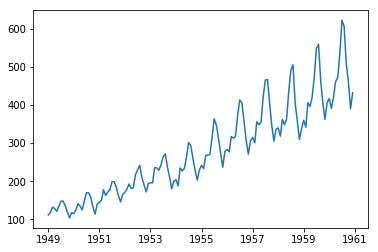

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.spatial import distance

import scipy.linalg
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv')
df.Month = pd.to_datetime(df.Month)
print(df.head())
plt.plot(df['Month'],df['#Passengers'])
x = df.values[:,1]


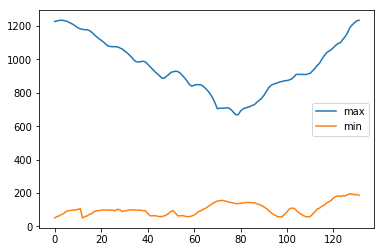

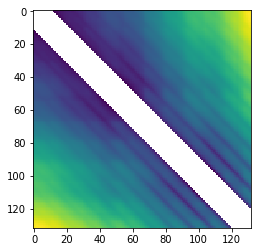

In [2]:
T = x.shape[0]
m = 12
_x = np.zeros([T-m,m])
for t in range(T-m):
    _x[t] = x[t:(t+m)]
#     _x[t] = (_x[t]-_x[t].mean())/(_x[t].std()+1e-7) # Optional frame-normalization.
    
v = np.zeros(T-m)
v[:m] = np.nan

D = distance.squareform(distance.pdist(_x,metric='euclidean'))+scipy.linalg.toeplitz(v,v)

d_max = np.nanmax(D,0)
d_min = np.nanmin(D,0)

plt.plot(d_max,label='max')
plt.plot(d_min,label='min')
plt.legend()
plt.show()
plt.imshow(D,interpolation=None)
plt.show()

# Dynamic Time Warping
https://www.cs.unm.edu/~mueen/DTW.pdf

22.218720994890937


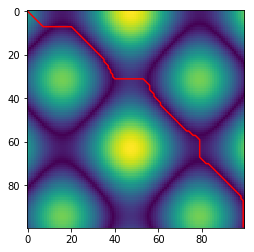

In [3]:
def dist_matrix(x,y,dist = lambda x,y : np.abs(x-y)):
    nx,ny = x.shape[0],y.shape[0]
    D = np.zeros([nx,ny])+np.nan
    for i in range(nx):
        _x = np.expand_dims(x[i],0)
        D[i] = dist(_x,y)

    return D

#!pip install fastdtw
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

t = np.arange(100)/10
y = np.sin(t)
x = np.cos(t)

x = (x-x.mean())/x.std()
y = (y-y.mean())/y.std()
dist, path = fastdtw(x,y, dist=euclidean,radius=10)
print(dist)

plt.imshow(dist_matrix(x,y))
plt.plot(np.array(path)[:,1],np.array(path)[:,0],color='red')

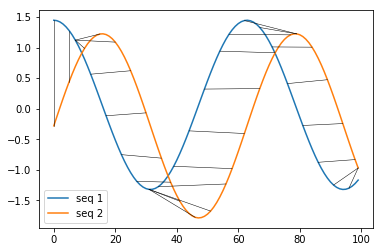

In [4]:
plt.plot(x,label='seq 1')
plt.plot(y,label='seq 2')
for t in range(len(path)):
    if not t%5:        
        plt.plot(path[t],[x[path[t][0]],y[path[t][1]]],lw=0.5,color='black')
plt.legend()